# Clustering - Comparing between K-Means and DBSCAN

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
ds = pd.read_csv('clustering.csv')

In [4]:
ds.head()

,Unnamed: 0,A,B
0,0,0.329241,0.841783
1,1,1.697407,-0.236075
2,2,-0.831460,0.584743
3,3,1.825271,-0.297894
4,4,1.236577,0.121528


In [5]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  300 non-null    int64  
 1   A           300 non-null    float64
 2   B           300 non-null    float64
dtypes: float64(2), int64(1)
memory usage: 7.2 KB


### 1 - Perform K-Means clustering 

In [6]:
# Setting up data and scaling to a standard range

from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
x = ds.iloc[:, [1,2]].values
xx = ss.fit_transform(x)
xx

array([[-0.19367631,  1.19707246],
       [ 1.35934632, -0.94233962],
       [-1.51120366,  0.68688054],
       [ 1.50448679, -1.06504283],
       [ 0.83625314, -0.23254316],
       [ 1.71217898, -0.05560362],
       [-0.62854007, -0.04333449],
       [-1.48655212,  0.69062538],
       [ 0.54335099, -1.53549856],
       [-0.1885917 , -1.15412242],
       [-0.57233973,  0.08530069],
       [ 1.70365043, -0.84803885],
       [ 0.42210233, -0.44388723],
       [-1.62947258,  0.38593899],
       [-0.55262164, -0.25998898],
       [-1.50496388,  0.62031921],
       [ 1.10513637, -1.01082203],
       [ 0.38189332, -1.64868256],
       [-0.57425797,  1.48875469],
       [ 1.69212349, -0.13186847],
       [ 0.64464852, -0.2842848 ],
       [-0.17188414, -1.00013217],
       [-0.40308758,  1.37018963],
       [ 0.47195018,  0.6674501 ],
       [-0.04455545,  1.28442231],
       [ 1.00641662, -1.62400292],
       [ 0.41258526,  0.85328116],
       [ 1.00260241, -1.63401717],
       [-1.77578325,

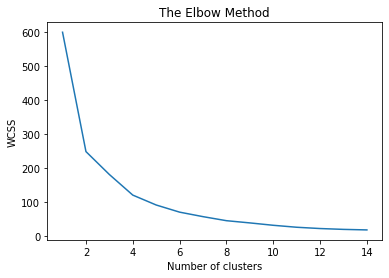

In [7]:
# Using Elbow Method to estimate K, the optimum no. of clusters

from sklearn.cluster import KMeans

wcss = []
for i in range(1, 15):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(xx)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 15), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [8]:
# From the Elbow Method above, pick K = 4

kmeans = KMeans(n_clusters = 4, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(xx)
y_kmeans

array([1, 3, 2, 3, 3, 3, 2, 2, 0, 0, 2, 3, 0, 2, 2, 2, 3, 0, 1, 3, 3, 0,
       1, 1, 1, 0, 1, 0, 2, 0, 2, 2, 0, 1, 3, 3, 2, 0, 1, 1, 0, 0, 1, 0,
       3, 1, 1, 2, 0, 1, 3, 2, 0, 2, 1, 0, 1, 3, 1, 3, 3, 1, 3, 0, 3, 3,
       3, 2, 3, 3, 3, 0, 2, 0, 1, 1, 2, 3, 1, 3, 0, 2, 1, 2, 0, 0, 1, 3,
       2, 2, 1, 0, 3, 1, 2, 0, 3, 3, 2, 1, 0, 1, 0, 0, 2, 1, 3, 0, 1, 3,
       0, 1, 1, 1, 0, 1, 2, 1, 0, 3, 2, 2, 1, 0, 2, 3, 0, 0, 1, 1, 0, 3,
       3, 0, 1, 0, 1, 0, 0, 0, 1, 3, 0, 1, 3, 0, 0, 3, 1, 3, 1, 0, 3, 1,
       1, 3, 1, 1, 1, 0, 1, 1, 0, 3, 1, 1, 3, 3, 2, 2, 0, 0, 3, 3, 1, 2,
       2, 0, 3, 1, 1, 0, 1, 3, 2, 0, 1, 1, 0, 1, 0, 1, 2, 2, 2, 0, 2, 1,
       2, 3, 1, 1, 0, 1, 3, 0, 0, 3, 2, 0, 3, 1, 2, 2, 3, 2, 1, 2, 2, 2,
       3, 0, 1, 2, 2, 2, 2, 0, 0, 0, 3, 1, 0, 3, 3, 0, 0, 1, 1, 1, 0, 1,
       3, 1, 2, 3, 0, 3, 0, 2, 3, 2, 2, 2, 3, 2, 3, 2, 1, 3, 2, 2, 3, 1,
       0, 1, 3, 3, 2, 0, 3, 0, 3, 3, 0, 2, 1, 1, 0, 1, 2, 1, 1, 0, 1, 2,
       2, 1, 2, 2, 0, 2, 1, 0, 0, 3, 0, 3, 1, 3])

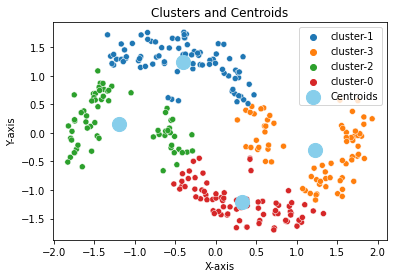

In [9]:
# Visualizing the K-Means clustering

import seaborn as sns

sns.scatterplot(xx[:, 0], xx[:, 1], hue=['cluster-{}'.format(x) for x in y_kmeans])
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 200, c = 'skyblue', label = 'Centroids')
plt.title('Clusters and Centroids')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend()
plt.show()

In [10]:
# Calculate the Silhouette score

from sklearn.metrics import silhouette_score

score = silhouette_score(xx, kmeans.labels_, metric='euclidean')
print(score)

0.4329118241119466


Brief discussion on the K-Means clustering done:

1 - Number of cluster of 4 was manually determined from the plot obtained by using Elbow method

2 - Each data point belongs to one of the 4 clusters (i.e., no data point is left out - no outliers are identified)

3 - Silhouette score of 0.43 is quite bad. The score is nearer to 0 than 1, which suggests that the clusters are NOT dense and NOT well separated, and inclined towards overlapping.

4 - Note that for 2 out of the 4 clusters - cluster 1 (orange) and cluster 3 (green) - there is a noticeable gap within each cluster, with the centroid located inside the said gap. This suggests that the clustering is NOT well executed, which agrees with the bad Silhouette score of 0.43 obtained previously.

### 2 - Perform DBSCAN clustering

In [11]:
# Setting up data and scaling to a standard range

from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
x = ds.iloc[:, [1,2]].values
xx = ss.fit_transform(x)
xx

array([[-0.19367631,  1.19707246],
       [ 1.35934632, -0.94233962],
       [-1.51120366,  0.68688054],
       [ 1.50448679, -1.06504283],
       [ 0.83625314, -0.23254316],
       [ 1.71217898, -0.05560362],
       [-0.62854007, -0.04333449],
       [-1.48655212,  0.69062538],
       [ 0.54335099, -1.53549856],
       [-0.1885917 , -1.15412242],
       [-0.57233973,  0.08530069],
       [ 1.70365043, -0.84803885],
       [ 0.42210233, -0.44388723],
       [-1.62947258,  0.38593899],
       [-0.55262164, -0.25998898],
       [-1.50496388,  0.62031921],
       [ 1.10513637, -1.01082203],
       [ 0.38189332, -1.64868256],
       [-0.57425797,  1.48875469],
       [ 1.69212349, -0.13186847],
       [ 0.64464852, -0.2842848 ],
       [-0.17188414, -1.00013217],
       [-0.40308758,  1.37018963],
       [ 0.47195018,  0.6674501 ],
       [-0.04455545,  1.28442231],
       [ 1.00641662, -1.62400292],
       [ 0.41258526,  0.85328116],
       [ 1.00260241, -1.63401717],
       [-1.77578325,

Text(0, 0.5, 'Distance')

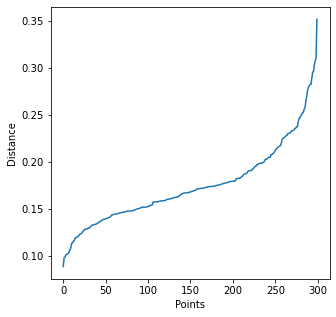

In [12]:
# Apply Knee Locator

from sklearn.neighbors import NearestNeighbors
from kneed import KneeLocator

nearest_neighbors= NearestNeighbors(n_neighbors=11)
neighbors = nearest_neighbors.fit(x)
distances, indices = neighbors.kneighbors(x)

distances = np.sort(distances[:,10], axis=0)
i= np.arange(len(distances))
knee = KneeLocator(i, distances, S=1, curve='convex', direction='increasing', interp_method='polynomial')

fig = plt.figure(figsize=(5, 5))
plt.plot(distances)
plt.xlabel("Points")
plt.ylabel("Distance")

0.20944238336191917


<Figure size 360x360 with 0 Axes>

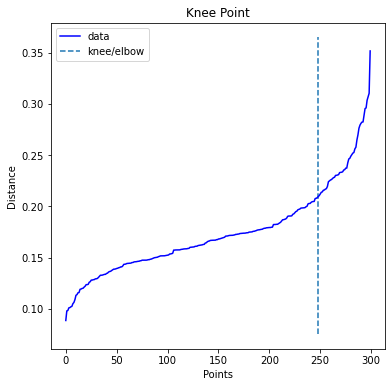

In [13]:
# Get the optimum knee

fig = plt.figure(figsize=(5, 5))
knee.plot_knee()
plt.xlabel("Points")
plt.ylabel("Distance")
# plt.savefig("knee.png", dpi=300)
print(distances[knee.knee])

Text(0, 0.5, 'Y-axis')

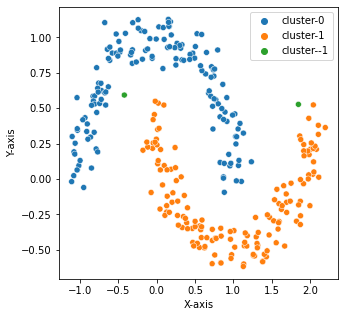

In [14]:
# Implement DBSCAN clustering using the optimum knee obtained
# Then visualize the clustering

from sklearn.cluster import DBSCAN

db = DBSCAN(eps=distances[knee.knee], min_samples=10).fit(x)
labels = db.labels_

fig = plt.figure(figsize=(5, 5))
sns.scatterplot(x[:,0], x[:,1], hue=["cluster-{}".format(x) for x in labels])
plt.xlabel('X-axis')
plt.ylabel('Y-axis')

Brief discussion on the DBSCAN clustering done:

1 - Number of cluster of 2 was automatically determined by using Knee Locator method

2 - Clustering results visualization shows that the 2 clusters are well separated and distinguished between one another

3 - Outliers are identified, represented by cluster = -1

### Brief summary on the comparison between K-Means and DBSCAN clustering done for the dataset

Discussion:

DBSCAN is the better clustering technique for this dataset, for the following reasons:

1 - DBSCAN is able to identify outliers. Hence, the clustering results will not be impacted by the "noises" present.

2 - DBSCAN does not require number of cluster as an input. By using Knee Locator technique, the optimum number of cluster is automatically determined. This eliminated the uncertainty caused when using K-Means, whereby the number of cluster K still needs to be determined manually from the plot despite having conducted the Elbow method.

3 - DBSCAN is able to identify clusters with arbitrary shape. That is why DBSCAN is able to excellently capture the clustering of the dataset, which actually only needs 2 clusters. 1 cluster for the u-shape (cluster 1) and another one for the n-shape (cluster 0). 